# Agglomerative Clustering
## for random Data blobs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generating Rnadom Data Set with 2 features having 4 clusters

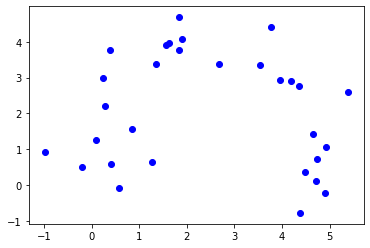

In [2]:
from sklearn.datasets import samples_generator

n_samples = 30
n_features = 2
centers = [[1, 1], [1, 4], [5, 0], [4, 3]]   # Centroids for k = 4
data, y = samples_generator.make_blobs(n_samples, n_features, centers, cluster_std=0.9)

plt.scatter(data[:,0], data[:,1], c='b', marker='o')
plt.show()

### Training Agglomerative Algorithm

In [3]:
from sklearn import cluster

k = 4
linkage = 'complete'   # linkage = "ward", "complete", "average", "single"

clust = cluster.AgglomerativeClustering(n_clusters=k, linkage=linkage)
clust.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4,
                        pooling_func='deprecated')

### Ploting the Clusters

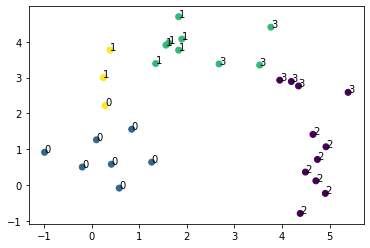

In [4]:
# Createing a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))
for i in range(data.shape[0]):
    plt.text(data[i, 0], data[i, 1], str(y[i]))  # data point belonging to which original cluster.
plt.scatter(data[:, 0], data[:, 1], c=clust.labels_, marker='o')
plt.show()

### Creating a Dendrogram

In [5]:
from scipy import spatial

dist_matrix = spatial.distance_matrix(data, data) 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


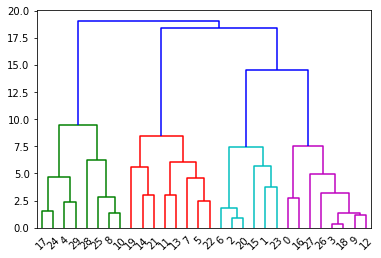

In [6]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(dist_matrix, method=linkage)
dendrogram = hierarchy.dendrogram(Z)